# Project 8 Report
# Team members: Manish Meshram,Supratik Chanda
# Introduction:
### The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 
### The primary purpose of our analysis is to find out the effect of various tuning parameters of the decision tree classifiers on the dataset. 
### We will also extract the effect of gini feature importance and how they are correlated with finding node impurity.
### More valuable insights like the usage of min_samples_split, max_leaf_nodes, max_features etc. are provided.

# Dataset:
### Input variables (based on physicochemical tests):
### 1 - fixed acidity 
### 2 - volatile acidity 
### 3 - citric acid 
### 4 - residual sugar 
### 5 - chlorides 
### 6 - free sulfur dioxide 
### 7 - total sulfur dioxide 
### 8 - density 
### 9 - pH 
### 10 - sulphates 
### 11 - alcohol 
### Output variable (based on sensory data): 
### 12 - quality (score between 0 and 10) 
### Data Cleansing Techniques:
### Check any column or axis has a null value or not.If there is a null value, remove that column to make accurate prediction
### Check the datatypes of each column so that each datatype is of float or int
### Remove the duplicate rows that are present in the dataset 
### Reseting the index of the unique rows of the dataframe

# Analysis Technique:

### To kick off the analysis, we found out the most important features from the X features or the independent columns
### For this, we used the SelectKBest function of the feature Selection package of Scikit learn.
### We used chi2 as the score function and found out the p-valuesa and scores  of every column of X Feature.
### Then, we created a dataframe containing the name of the X Features columns , their p_values and the scores from highest p_values and score to the lowest.
### From the 10 features, according to the p_values we took the first 6 columns with highest p_values for the decisiontree classifier
### Surprisingly when we counted the number of unique values of the Y Label , there is a high percentage of few Labels and extremely low number of other Labels like 1 and 2
### We also used the feature importance or gini importance of every column using the feature_importanes_ function of decisiontreeclassifier.
### We used 3 types of tuning parameters of decisiontreeclassifier:
### 1) Minimum samples of leaf at each node(internal and leaf)
### 2) Maximum depth of the tree
### 3) Maximum leaf nodes

# 1) Minimum samples of leaf at each node(internal and leaf)

## Part1 Analysis: Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 1000
<img src='DecisionTree/min_samples_pic_1.png' style='height:200px'/>

### This image provides a detailed analysis why although the maximum depth is 3, but there are no internal nodes as well as leaf nodes. 
### There is only one node. This is because of the parameter known as minimum samples of leaf at each node. 
### As we see that, the min_samples_leaf is equal to 1000. So, if the leaf has to be splitted into two other leaf nodes, then the samples would have been less than 1000.
### Henceforth, although the max_depth is 3 , the leaf has no branch.
### The bias-variance tradeoff does depend on the depth of the tree. Since, the depth of the tree is 0 , the tree has high bias and low variance. That means, that the tree wil make huge assumptions in predicting the target Label while greatly change if we change few samples in training dataset.
### If we look at the gini parameter, it is 0.648. This means that the node is not at its purest level.
### As you can see, the root node (depth=0) didn't chose any X Feature as the splitting feature.

## Part2 Analysis:Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 500
<img src='DecisionTree/min_samples_pic_2.png' style='height:200px'/>

###  As you can see in the figure, the maximum depth is 1 not 3.
### This is because of the minimum_samples_split.If the nodes were splitted further into leaf nodes, then the minimum no of samples of each leaf node would have been lesser than 500 and that contradicts the parameter min_samples_leaf which is 500.
### Therefore each sample at every node has a value greater than 500.
### Hence, proved that min_samples_leaf has a greater effect than max_depth.
### The root node (depth=0) chose "alcohol" as the splitting feature, and 10.15 as the threshold value. 
### The bias-variance tradeoff does depend on the depth of the tree. Since, the depth of the tree is 1 , the tree has relatively less higher bias and a bit higher variance. That means, that the tree will make less huge assumptions in predicting the target Label while change to a certain amount if we change few samples in training dataset.
### The gini impurity is 0.648 and still high. It is still far away than its purest form .
### The two depth 1 nodes didn't chose any of the X Features as the their splitting feature, respectively.
### The two leaf nodes (depth=1) each predicts a class - one of them predict class_5 and one predicts class_6. 
### Both of the leaf nodes have a large gini impurity (0.517 and 0.656). Hence, the tree suggests that it is not fitted properly and can be further broken down.

## Part3 Analysis:Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 500
<img src='DecisionTree/min_samples_split_1.png' style='height:300px'/>

### As it is seen, in this case the max_depth is 3 and not less.
### This is because even after reaching a depth of 3 , the leaf nodes' samples count is more than 100. The least sample leaf count is 103.
### The total leaf nodes count is exactly 10. 
### If the max leaf nodes were 2  then although the min_samples_leaf would be more than 500, max_depth would be 1

### This is because the max_leaf_nodes were attained and no more spitting would happen. 
### The highest and most significant gini value is found to be 0.244 which determines a class of 5. For this particular node, the leaf has low bias and high variance. For the other cases, since the node is not pure, the node has high bias and low variance.

# 2) Maximum depth of the tree
### Part 1 Analysis: Max_depth is 1  while min_samples_leaf is 10
<img src='DecisionTree/max_depth_1.png' style='height:400px'/>
### This image provides a detailed analysis why depth is 1 although the minimum samples leaf is 10.
### As you can see, the root node (depth=0) chose "alcohol" as the splitting feature, and 10.15 as the threshold value. The two depth 1 nodes has gini value as 0.517 and 0.656 which means that the leaf node is not all homogenous and has a high bias. These attributes are explained below:

### In each node, "samples" represents how many training instances fall in that node. For example, there are 1359 samples that has alcohol <= 10.15.
### The attribute "value" gives how many instances fall in each class for each node. For example, in the leftmost leaf node, there are 676 instances in class_5,  and 683 instances in class_6.
### Each node is also assigned a "class" based on which class has the majority of the instances in that node. Therefore, even though the root node has comparable number of instances in each of the three classes, the root node's class label is "class_5" since 425 > 197 > 29.....
### To make a prediction, you keep going along the tree until you reach a leaf node. The probability of each class is the fraction of training samples of each class in a leaf node. For example, the bottom left leaf node predicts class_2 with a probaility of  425/676≈ 62.0%. This attribute can be obtained through DecisionTreeClassifier's predict_proba() function. Note that all samples that fall in the same leaf node share the same prediction probability.

### Now if we add max_leaf_nodes in the analysis:Max_depth is 1 ,max_leaf_nodes is 3 while min_samples_leaf is 10.
<img src='DecisionTree/max_depth_2.png' style='height:400px'/>
### The first question that comes to mind is although the max depth is 1 , then why in the diagram the max depth is 2. This is because of the parameter max_leaf_nodes. 
### Although the max depth is 1, the algorthim prints the tree till the max_leaf_nodes is not exhausted. In depth 1, the leaf nodes are 2 which is less than 3 . Hence the depth goes down to level 2 and then the max_leaf_nodes become 3. From this we can infer that max_leaf_nodes has a greater priority over max_depth.
### The gini impurity is still high and far away from giving homogenous nodes.
### In each node, "samples" represents how many training instances fall in that node. For example, there are 1359 samples that has alcohol <= 10.15.
### So, the parent node is divided into two internal nodes,one with alcohol > 10.15 and other with alcohol <=10.15 and total sulfur dioxide <=98.5 .The internal node with total sulfur dioxide is further divided into two leaf nodes.
### For Leaf Node 1: gini is 0.552, that implies that the leaf node has a high bias . Node 2 has a good gini though, 0.106 close to 0 and that tells that the leaf nodes is rather pure with a low bias. 
### For the leaf node which has alcohol value > 10.15, we have a bad gini which is equal to 0.656.

### Part 2 Analysis: Max_depth is 5 and max_leaf_nodes is 10 while min_samples_leaf is 10

### In this case,the algorithm first goes to a depth of 5 and sees that leaf nodes produced by the tree is 10. So all the criteria is matched and hence no more depth.
### The best gini parameter that we got in this tree is of 0.106. The gini impurity is close to 0.0. Hence,for this node we can say that it is highly homogenous and have a class_5
### First branch(left side) details where all  the nodes are highlighted:

<img src='DecisionTree/max_depth_3.png' style='height:400px'/>

### First internal node(total sulfur dioxide) is formed by one condition: alcohol < = 10.15 
### The next two internal nodes are formed by: total sulfur dioxide .One leaf node with total sulfur dioxide > 98.5 with a great gini value 0.106.The other internal node with total sulfur dioxide <=98.5 and lower gini value 0.552
### The next two internal nodes are formed by: sulphates.One leaf node with sulphates<=0.585.The other node with condition sulphates>0.585.
### The node with sulphates >0.585 is further divided into two nodes. The condition is volatile acidity <=0.548
### The nodes formed by the condition volatile acidity <=0.548 are the leaf nodes.

### Second branch(right side) details where all the nodes are highlighted:

<img src='DecisionTree/max_depth_4.png' style='height:400px'/>

### First internal node(alcohol <=11.55) is formed by one condition: alcohol > 10.15 
### The internal node alcohol <=11.55 is broken into two nodes.One node with volatile acidity <=0.375 with a  gini value 0.638.The other internal node with sulphates <=0.685 and has a  gini value 0.621
### The node containing volatile acidity <=0.375 is further divided into two nodes.One is a leaf node and the other is an internal node. The internal node has a condition of sulphates <=0.585 and is also divided into one leaf node and the other internal node with a condition of residual sugar <=4.1. This internal node is ultimately divided into two leaf nodes with bad gini impurity of 0.513 and 0.56.
### On the other hand, the node with sulphates <=0.685 is further divided into two leaf nodes and is complete. The two leaf nodes has a moderate gini impurity of 0.55 and 0.585. Both of them is not homogeneous. The bias is high, that means the prediction will take a lot of assumption.And as the variance is low, any sample addition is not going to make a significant difference in the predicted result.

# 3) Maximum leaf nodes
### Part 1 Analysis: Max_depth = 5,max_leaf_nodes = 2,min_samples_leaf=10

<img src='DecisionTree/Max_leaf_nodes_1.png' style='height:400px'/>

### This image provides a detailed analysis of why the tree having a max_depth of 5 only lands up to a depth of 1.
### The parameters given in making the decisiontree are max_depth,max_leaf_nodes and min_samples_split. As soon as the first parent node with a condition of alcohol<=10.15 splits into two leaf nodes, the parameter max_leaf_nodes is exhausted. We have two leaf nodes.One with a gini impurity of 0.517 and the other with a gini impurity of 0.656. Both of them are not homogeneous and have a high bias and low variance. This tree is therefore, not capable of producing a good prediction as the nodes are not in the purest form.

### Part 2 Analysis: Max_depth = 5,max_leaf_nodes = 3,min_samples_leaf=10

<img src='DecisionTree/Max_leaf_nodes_2.png' style='height:400px'/>

### This image provides a detailed analysis of why the tree having a max_depth of 5 only lands up to a depth of 2.
### The parameters given in making the decisiontree are max_depth,max_leaf_nodes and min_samples_split. The first parent node is divided on the condition alcohol <=10.15.One of them with a condition of alcohol >10.15 is a leaf node, with a bad gini value of 0.656 which is not all homogeneous.The other internal node that is formed with the condition alcohol<= 10.15 is divided into two leaf nodes.The condition for splitting is total sulfur dioxide. One of them has total sulfur dioxide <=98.5 and the other has total sulfur dioxide >98.5. Both of them are leaf nodes. One of them is not though in its purest forms. Gini value is high amd close to 0.6. While the other one is more closer to its purest form . The gini value is 0.106 which is more nearer to 0.0. The bias for this node is relatively much lower and has a high variance. This is definitely good.So the total leaf nodes is already 3 but the max_depth is not 5 . Now , if any of the tree node gets divided into to leaf nodes , the max_leaf_nodes would be higher than 3 and that violates the parameter max_leaf_nodes. Henceforth, the max_depth is retained at 2.



# Results:
## Min_Samples_Leaf:
<img src='DecisionTree/min_samples_result_1.png' style='height:200px'/>

### The parameters given are Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 1000.Since the minimum number of samples in each leaf is given as 1000,if the parent and only node(depth=0) is divided into leaf nodes, then the samples size would have been lesser than 1000. This violates the parameter min_samples_leaf. Hence, although the max_depth is not 3, the tree is stopped, there is no breakage of internal nodes to leaf nodes and the gini parameter of the only node becomes 0.648. The gini impurity result implies that the only node is not at all homogeneous and the bias is high .Therefore , the results or predictions are going to be hugely assumed. This tree is not all in its purest form.


<img src='DecisionTree/min_samples_result_2.png' style='height:300px'/>

### In contrast to the previous diagram, this decision tree has more leaf nodes and has lesser gini impurity values. The parameters given for making this tree are Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 500. The primary reason for getting depth 1 leaf nodes is because of the minimum samples. This time , the minimum samples have been reduced from 1000 to 500. So, the tree can break into two leaf nodes and have a depth of 1. Though the gini impurity has decreased a bit yet it has a high value closer to 1.0 which is not at all pure. Hence,again the bias-variance trade off is not justified to the fullest. This tree has relatively higher bias and lower variance.The depth is 1 instead of 3.

<img src='DecisionTree/min_samples_result_3.png' style='height:400px'/>

### Among all of the three diagrams, this is the best tree in terms of gini impurity and bias-variance importance. the depth of the tree is 3 which is fully shown in the diagram. The tree is broken into internal and leaf nodes on the basis of few features: alcohol, total sulfur dioxide,sulphates, volatile acidity. The leaf node that is formed from "total sulfur dioxide <= 83.5 =False" has the most significant gini impurity value ,0.244. This is closer to 0.0 . This leaf node has a low bias and a high variance. Any sample replacement will have a deep impact on the predicted class due to high variance. The gini values for class=6 is more than 0.5 . This is not pure and therefore, we can assume that any prediction of class_6 will be based on some assumption.But this time, the min_samples_leaf was 100 ,so when the depth of the tree becomes 3, the sampels in each node is still aobve 100. Thus making the depth ultimately attain a value of 3.

## Max_depth

<img src='DecisionTree/max_depth_result_1.png' style='height:300px'/>

### The parameters are : Max_depth is 1 and max_leaf_nodes is 3 while min_samples_leaf is 10.The maximum depth parameter given in this diagram is 1 which is fully shown in the diagram. This picture shows the effectiveness of max_depth parameter. The algorithm produces a tree of 2 leaf nodes . This means that there is another room for om more leaf nodes. But as we see that max_depth is 1, the tree is already divided into two branches and therefore has depth of 1. Since the max_depth parameter is exhausted, no more leaf nodes is formed. Although, the main problem with the decision tree is its gini values. They are closer to 1.0 . Therefore, the tree is not at all in its purest form.

<img src='DecisionTree/max_depth_result_2.png' style='height:400px'/>

### The parameters are : Max_depth is 2  while min_samples_leaf is 10. Like the previous diagram, this tree has also adhered to its depth parameter,that is 2. The attributes used for splitting the nodes are: alcohol, total sulfur dioxide. This time although the minimum samples leaf is way greater than 10, yet the tree does not have more depth than 2 due to max_depth parameter. The gini value is still closer to 0.6 for most of the nodes. There is one node that's relatively pure and has a gini value of 0.106. This is good since this node is almost pure. This means that this node has a lower bias and a higher variance. The sample size is 90 where sample 2 consists of 85.

<img src='DecisionTree/max_depth_result_3.png' style='height:500px'/>

### This is most complex tree with parameters :Max_depth is 5 and max_leaf_nodes is 10 while min_samples_leaf is 10. On reaching the depth of 5, the leaf nodes aare exactly 10 and the min_samples_leaf is greater than 10. So,all the points are covered and all the parameters is taken care of. If the max_leaf_nodes would have been 20, then the parameter max_leaf_nodes would not have reached 20. This is because on a depth of 5, max leaf nodes is 10. So in order to produce more leaf nodes , depth has to increase . But the depth parameter is 5 which is already exhausted. Thus, the tree would have been exactly like this one even though the max_leaf_nodes was less than 20. There is no significant improvement in the gini value . All of them are nearer to 0.6. This leads to the fact that these tree nodes are not not pure and prediction will be based on assumption which is not reliable.

## Maximum leaf nodes

<img src='DecisionTree/max_leaf_nodes_result_1.png' style='height:400px'/>

### The parameters for this diaagram are:Max_depth is 5 and max_leaf_nodes is 2 while min_samples_leaf is 10. Here we see that although the max_depth is 5 and min_samples_leaf is 10, the tree has only 1 depth. This is because of the parameter: max_leaf_nodes. After getting a depth of 1, we see that the tree has already reached 2 leaf nodes. Therefore, if the tree had expanded to depth 2, then the total number of leaf_nodes would have exceeded 2. This would have violated the parameter max_leaf_nodes which says 2. At deoth 1 , the 2 leaf_nodes is attained. Both the gini values are higher. So, we can safely assume that this tree can have more nodes and is not in its pure or homogeneous form. Moreover, the tree has higher bias which makes it vulnerable for assumption of unseen values.

<img src='DecisionTree/max_leaf_nodes_result_2.png' style='height:500px'/>

### For this diagram, the parameters that have been used are: Max_depth is 5 and max_leaf_nodes is 3 while min_samples_leaf is 10. Here we again see that the tree abided by the parameter: max_leaf_nodes which is 3. Although the depth is in its basic stage : 2, the tree is not getting more depth. This is because, if the tree would have got depth:4, then the leaf_nodes would have surpassed 3 . This doesn't follow the parameter:max_leaf_nodes = 3 which is already attained. However, we find out the one leaf node has come closer to its purest form and has a gini value of 0.106. This means that the class_value is not based on assumption and has a low bias tradeoff error.

<img src='DecisionTree/max_leaf_nodes_result_3.png' style='height:600px'/>

### At last in this diagram we see that the parameters:Max_depth is 5 and max_leaf_nodes is 10 while min_samples_leaf is 10 is fully utilized. The depth is 5 , max leaf nodes  are 10 and samples are way above 10. Unfortunately, the gini value doesn't get better. This tree although is deep and has a lot more nodes, the bias is not all good. This is because the gini values are still on a a higher range and hencforth the tree is not good for prediction .

### Finally the prediction results:

<img src='DecisionTree/prediction_results.png' style='height:400px'/>

### The tree shows an at par accuracy and f1_score.


In [354]:
import graphviz

In [360]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
import matplotlib.pyplot as plt
import os
os.environ["PATH"] +=os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [366]:
#df=pd.read_csv('https://github.com/SupChanda/Wine-Type-Prediction-Using-Decision-Trees/blob/master/winequality-red.csv')
df=pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,$7.40,$0.70,$0.00,$1.90,$0.08,$11.00,$34.00,$1.00,$3.51,$0.56,$9.40,5
1,$7.80,$0.88,$0.00,$2.60,$0.10,$25.00,$67.00,$1.00,$3.20,$0.68,$9.80,5
2,$7.80,$0.76,$0.04,$2.30,$0.09,$15.00,$54.00,$1.00,$3.26,$0.65,$9.80,5
3,$11.20,$0.28,$0.56,$1.90,$0.07,$17.00,$60.00,$1.00,$3.16,$0.58,$9.80,6
4,$7.40,$0.70,$0.00,$1.90,$0.08,$11.00,$34.00,$1.00,$3.51,$0.56,$9.40,5


In [367]:
df = df.applymap(lambda x : str(x).replace('$',''))

In [368]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [369]:
df.shape

(1599, 12)

In [370]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [371]:
df.dtypes

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object

In [372]:
df[df.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
9,7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5
11,7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
27,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
39,7.3,0.45,0.36,5.9,0.07400000000000001,12.0,87.0,0.9978,3.33,0.83,10.5,5
40,7.3,0.45,0.36,5.9,0.07400000000000001,12.0,87.0,0.9978,3.33,0.83,10.5,5
64,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


In [373]:
df.drop_duplicates(inplace=True)

In [374]:
df.shape

(1359, 12)

In [375]:
df.reset_index(drop=True,inplace=True)

In [376]:
df.index.values

array([   0,    1,    2, ..., 1356, 1357, 1358], dtype=int64)

In [377]:
np.set_printoptions()
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,chi2
SKBest = SelectKBest(chi2,k=11).fit(df.iloc[:,:-1],df.iloc[:,-1])
p_List =pd.Series(SKBest.pvalues_)
Score_List =pd.Series(SKBest.scores_)
print(SKBest.get_support(indices=True))
Selected_features = pd.Series(df.iloc[:,:-1].columns[SKBest.get_support()])

[ 0  1  2  3  4  5  6  7  8  9 10]


In [378]:
FeatureDTFrame =pd.concat([p_List,Score_List,Selected_features],axis=1)
FeatureDTFrame.columns=['P_Value_List','Score_Value_List','Features']
FeatureDTFrame = FeatureDTFrame.sort_values(by='P_Value_List',ascending=True,axis=0).reset_index(drop=True)

In [379]:
FeatureDTFrame

,P_Value_List,Score_Value_List,Features
0,$0.00,"$2,538.40",total sulfur dioxide
1,$0.00,$162.30,free sulfur dioxide
2,$0.00,$42.15,alcohol
3,$0.01,$14.17,volatile acidity
4,$0.05,$10.83,citric acid
5,$0.10,$9.27,fixed acidity
6,$0.53,$4.13,residual sugar
7,$0.57,$3.85,sulphates
8,$0.98,$0.74,chlorides
9,$1.00,$0.16,pH


In [380]:
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [400]:
print(FeatureDTFrame.Features[0:5])
X=df.loc[:,list(FeatureDTFrame.Features[0:5])]
Y=df.loc[:,['quality']]

0    total sulfur dioxide
1     free sulfur dioxide
2                 alcohol
3        volatile acidity
4             citric acid
Name: Features, dtype: object


In [401]:
dTree_1= DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10,min_samples_leaf=30,random_state=4)
dTree_1.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')

In [402]:
feature_importance = pd.DataFrame({'feature':X.columns, 'Gini_importance':dTree_1.feature_importances_})
feature_importance.sort_values(by='Gini_importance',ascending=True,inplace=True)
feature_importance

,feature,Gini_importance
1,free sulfur dioxide,$0.02
4,citric acid,$0.03
0,total sulfur dioxide,$0.11
3,volatile acidity,$0.18
2,alcohol,$0.67


In [403]:
(FeatureDTFrame.Features[0:8])

0    total sulfur dioxide
1     free sulfur dioxide
2                 alcohol
3        volatile acidity
4             citric acid
5           fixed acidity
6          residual sugar
7               sulphates
Name: Features, dtype: object

In [407]:
print(Y.iloc[[5],:])
dTree_1.predict(X.iloc[[5]])
#X.iloc[[5,6],:].shape

  quality
5       5


array(['5'], dtype=object)

## MIN_SAMPLES_LEAFS ANALYSIS

Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 1000


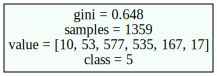

In [418]:
X=df.loc[:,list(FeatureDTFrame.Features[0:10])]
Y=df.loc[:,['quality']]
dTree_min_samples_nodes_1= DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10,min_samples_leaf=1000,random_state=4)
dTree_min_samples_nodes_1.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_min_samples_nodes_1,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 1000')
display(tempSVG)

Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 500


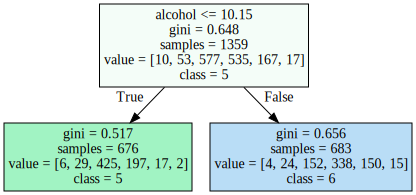

In [419]:
dTree_min_samples_nodes_2= DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10,min_samples_leaf=500,random_state=4)
dTree_min_samples_nodes_2.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_min_samples_nodes_2,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 3 and max_leaf_nodes is 10 while min_samples_leaf is 500')
display(tempSVG)

Max_depth is 3 while min_samples_leaf is 100


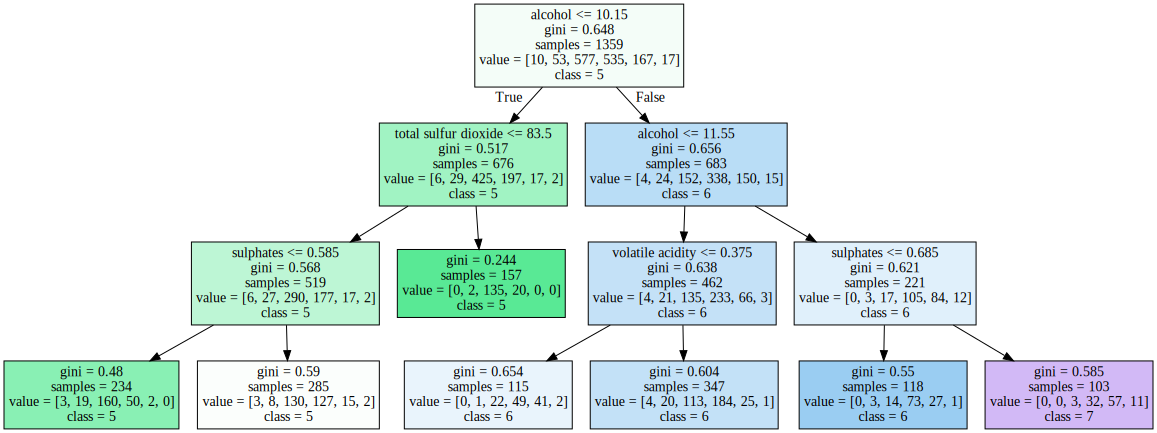

In [424]:
dTree_min_samples_nodes_3= DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=100,random_state=4)
dTree_min_samples_nodes_3.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_min_samples_nodes_3,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 3 while min_samples_leaf is 100')
display(tempSVG)

## MAX DEPTH ANALYSIS

Max_depth is 1 and max_leaf_nodes is 3 while min_samples_leaf is 10


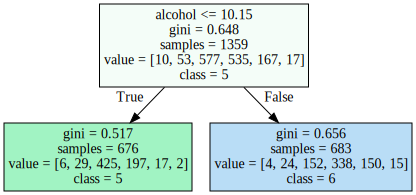

In [421]:
dTree_Max_Depth_1= DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_leaf=10,random_state=4)
dTree_Max_Depth_1.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Depth_1,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 1 and max_leaf_nodes is 3 while min_samples_leaf is 10')
display(tempSVG)

Max_depth is 2 and while min_samples_leaf is 10


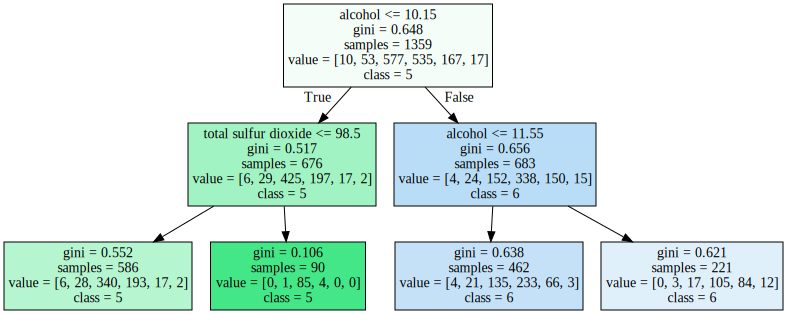

In [426]:
dTree_Max_Depth_2= DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=10,random_state=4)
dTree_Max_Depth_2.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Depth_2,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 2 and while min_samples_leaf is 10')
display(tempSVG)

Max_depth is 5 and max_leaf_nodes is 10 while min_samples_leaf is 10


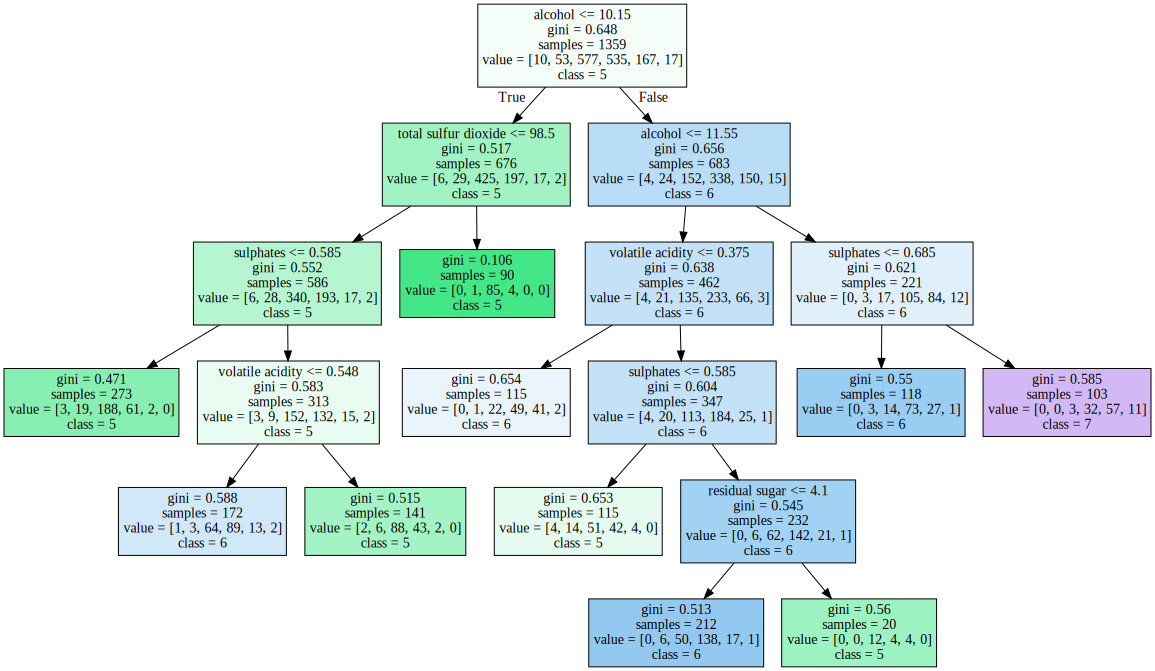

In [423]:
dTree_Max_Depth_3= DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=10,min_samples_leaf=10,random_state=4)
dTree_Max_Depth_3.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Depth_3,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 5 and max_leaf_nodes is 10 while min_samples_leaf is 10')
display(tempSVG)

##  MAX_LEAF_NODES_ANALYSIS

Max_depth is 5 and max_leaf_nodes is 2 while min_samples_leaf is 10


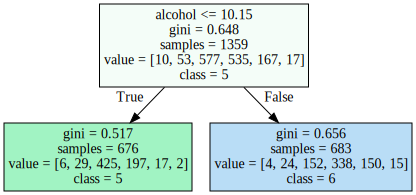

In [228]:
dTree_Max_Leaf_Nodes_1= DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=2,min_samples_leaf=10,random_state=4)
dTree_Max_Leaf_Nodes_1.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Leaf_Nodes_1,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 5 and max_leaf_nodes is 2 while min_samples_leaf is 10')
display(tempSVG)

Max_depth is 5 and max_leaf_nodes is 3 while min_samples_leaf is 10


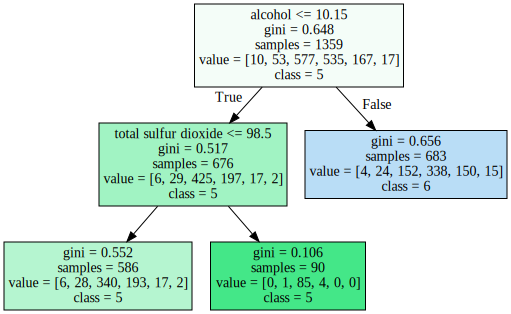

In [229]:
dTree_Max_Leaf_Nodes_2= DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=3,min_samples_leaf=10,random_state=4)
dTree_Max_Leaf_Nodes_2.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Leaf_Nodes_2,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 5 and max_leaf_nodes is 3 while min_samples_leaf is 10')
display(tempSVG)

Max_depth is 5 and max_leaf_nodes is 10 while min_samples_leaf is 10


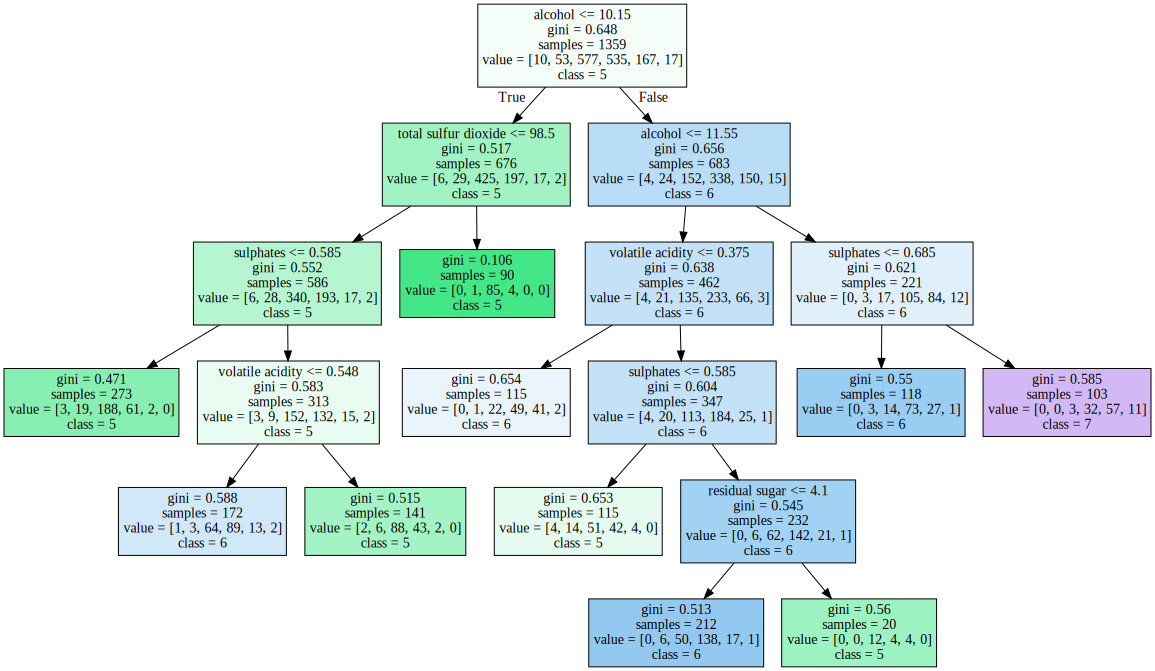

In [230]:
dTree_Max_Leaf_Nodes_3= DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=10,min_samples_leaf=10,random_state=4)
dTree_Max_Leaf_Nodes_3.fit(X,Y)
graph = Source(tree.export_graphviz(dTree_Max_Leaf_Nodes_3,feature_names=list(FeatureDTFrame.Features[0:10]),
                                    class_names=['3','4','5','6','7','8'],filled=True))
tempGraph = graph.pipe(format='svg')
tempSVG=SVG(tempGraph)
print('Max_depth is 5 and max_leaf_nodes is 10 while min_samples_leaf is 10')
display(tempSVG)

In [427]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test = train_test_split(df.loc[:,list(FeatureDTFrame.Features[0:8])],
                                                 df.loc[:,['quality']],test_size=0.20,stratify=Y,random_state=34)
cls= DecisionTreeClassifier(criterion='gini',max_depth=i,max_leaf_nodes=10,min_samples_leaf=10,random_state=4)
cls.fit(X_train,y_train)
print('The accuracy score is {}'.format(cls.score(X_test,y_test)))
print('\n',classification_report(y_test,cls.predict(X_test)))

The accuracy score is 0.6029411764705882

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.61      0.87      0.72       116
           6       0.59      0.44      0.51       107
           7       0.57      0.48      0.52        33
           8       0.00      0.00      0.00         3

   micro avg       0.60      0.60      0.60       272
   macro avg       0.30      0.30      0.29       272
weighted avg       0.56      0.60      0.57       272



C:\Users\supratik chanda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
